In [2]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline  

with open('Data/2015.tsv','r') as tsv:
    data = [line.strip().split('\t') for line in tsv]
    
col_names = data[0]
df = pd.DataFrame(data, columns=col_names)
df = df[1:]

#open code_sex.csv and convert it to a DataFrame
with open('Data/code_sex.csv','r') as csv:
    sex_descrip = [line.strip().split(',') for line in csv]

sex_header = sex_descrip[0]
df_sex = pd.DataFrame(sex_descrip, columns=sex_header)
df_sex = df_sex[1:]
indexed_df_sex = df_sex.set_index('Code')

#open code_body_part.csv and convert it to a DataFrame
with open('Data/code_body_part.csv','r') as csv:
    body_part_descrip = [line.strip().split(',') for line in csv]

body_part_header = body_part_descrip[0]
df_body_part = pd.DataFrame(body_part_descrip, columns=body_part_header)
df_body_part = df_body_part[1:]
indexed_df_body_part = df_body_part.set_index('Code')

#open code_diagnosis.csv and convert it to a DataFrame
with open('Data/code_diagnosis.csv','r') as csv:
    diagnosis_descrip = [line.strip().split(',') for line in csv]

diagnosis_header = diagnosis_descrip[0]
df_diagnosis = pd.DataFrame(diagnosis_descrip, columns=diagnosis_header)
df_diagnosis = df_diagnosis[1:]
indexed_df_diagnosis = df_diagnosis.set_index('Code')

#open code_disposition.csv and convert it to a DataFrame
with open('Data/code_disposition.csv','r') as csv:
    disposition_descrip = [line.strip().split(',') for line in csv]

disposition_header = disposition_descrip[0]
df_disposition = pd.DataFrame(disposition_descrip, columns=disposition_header)
df_disposition = df_disposition[1:]
indexed_df_disposition = df_disposition.set_index('Code')

#open code_fire.csv and convert it to a DataFrame
with open('Data/code_fire.csv','r') as csv:
    fire_descrip = [line.strip().split(',') for line in csv]

fire_header = fire_descrip[0]
df_fire = pd.DataFrame(fire_descrip, columns=fire_header)
df_fire = df_fire[1:]
indexed_df_fire = df_fire.set_index('Code')

#open code_locale.csv and convert it to a DataFrame
with open('Data/code_locale.csv','r') as csv:
    locale_descrip = [line.strip().split(',') for line in csv]

locale_header = locale_descrip[0]
df_locale = pd.DataFrame(locale_descrip, columns=locale_header)
df_locale = df_locale[1:]
indexed_df_locale = df_locale.set_index('Code')

#open code_product.csv and convert it to a DataFrame
with open('Data/code_product.csv','r') as csv:
    product_descrip = [line.strip().split(',',1) for line in csv]

product_header = product_descrip[0]
df_product = pd.DataFrame(product_descrip, columns=product_header)
df_product = df_product[1:]
indexed_df_product = df_product.set_index('Code')

#open code_race.csv and convert it to a DataFrame
with open('Data/code_race.csv','r') as csv:
    race_descrip = [line.strip().split(',') for line in csv]

race_header = race_descrip[0]
df_race = pd.DataFrame(race_descrip, columns=race_header)
df_race = df_race[1:]
indexed_df_race = df_race.set_index('Code')

#merge all the codes
df['sex_descrip']=df.sex.map(indexed_df_sex.Description)
df['body_part_descrip']=df.body_part.map(indexed_df_body_part.Description)
df['diag_descrip']=df.diag.map(indexed_df_diagnosis.Description)
df['disposition_descrip']=df.disposition.map(indexed_df_disposition.Description)
df['fire_descrip']=df.fmv.map(indexed_df_fire.Description)
df['locale_descrip']=df.location.map(indexed_df_locale.Description)
df['product1_descrip']=df.prod1.map(indexed_df_product.Description)
df['product2_descrip']=df.prod2.map(indexed_df_product.Description)
df['race_descrip']=df.race.map(indexed_df_race.Description)

#combine the 2 narr fields into 1
df['Notes'] = df['narr1'].map(str) + df['narr2'].map(str)

df1 = df[['CPSC Case #', 
         'trmt_date', 
         'psu', 
         'weight', 
         'age', 
         'sex_descrip', 
         'race_descrip',
         'body_part_descrip', 
         'diag_descrip', 
         'disposition_descrip', 
         'fire_descrip', 
         'locale_descrip', 
         'product1_descrip', 
         'product2_descrip', 
         'Notes']]

#convert numerical columns to numeric data type
df1 = df1.apply(lambda x: pd.to_numeric(x,errors="ignore"))

#convert 'trmt_date' column to datetime type
df1['trmt_date'] = df1['trmt_date'].apply(lambda x: pd.to_datetime(x,format='%m/%d/%Y'))

#remove quotation marks from product1_desrip field
df1['product1_descrip'] = df1['product1_descrip'].apply(lambda x: re.sub('"','',str(x)))

def textfind(dataframe, field, string):
    """ Takes dataframe, field (column in the dataframe), and a string to search
    Allow for use of regular expressions.
    Returns a dataframe of the records where the string is found"""
    import re
    a = [dataframe.loc[i] for i in dataframe.index \
         if re.search(string, dataframe[field][i])]
    return pd.DataFrame(a)
    
def notereader(dataframe):
    """ Takes a dataframe that contains the 'Notes' field and prints it out in a
    readable fashion.
    Returns a dictionary of Index (integer): Note (string) pairs"""
    output_dict ={}
    for i in dataframe.index:           
        output_dict[i] = dataframe.Notes[i]
        print ("INDEX", i,"\n", dataframe.Notes[i],"\n")
    return output_dict

pd.options.display.max_colwidth = 1000

In [61]:
df1.dtypes


CPSC Case #                     int64
trmt_date              datetime64[ns]
psu                             int64
weight                        float64
age                             int64
sex_descrip                    object
race_descrip                   object
body_part_descrip              object
diag_descrip                   object
disposition_descrip            object
fire_descrip                   object
locale_descrip                 object
product1_descrip               object
product2_descrip               object
Notes                          object
dtype: object

## Junk

In [437]:
dfjunk = textfind(df1, 'Notes', '\sRECTUM\s')[df1['age'] < 121]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


<function matplotlib.pyplot.show>

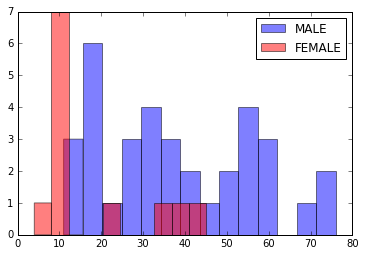

In [438]:
junk_M_plot = dfjunk[dfjunk.sex_descrip == 'MALE'].age
junk_F_plot =dfjunk[dfjunk.sex_descrip == 'FEMALE'].age
junk_m = plt.hist(junk_M_plot,alpha=0.5, bins = 14, color = 'blue',label='MALE')
junk_f = plt.hist(junk_F_plot,alpha=0.5, bins = 10,color = 'red',label='FEMALE')
plt.legend()
plt.show
#junk_M_plot

In [408]:
dfjunk.groupby('sex_descrip').age.mean()

sex_descrip
FEMALE    18.416667
MALE      38.114286
Name: age, dtype: float64

In [439]:
#dfjunk.groupby('sex_descrip')['age'].count().plot.bar()
len(dfjunk)

47

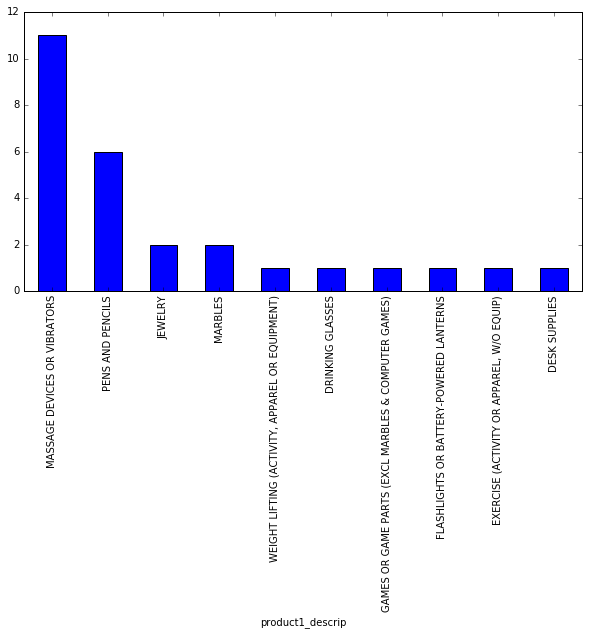

In [413]:
dfjunk.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,5))

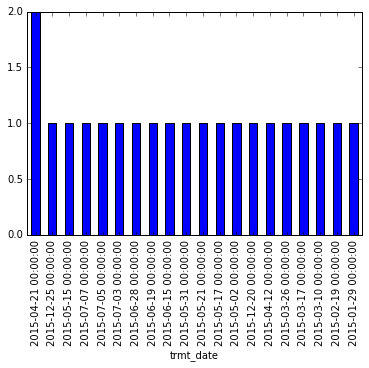

In [416]:
dfjunk.groupby('trmt_date')['age'].count().sort_values(ascending=False).head(20).plot.bar(by='sex_descrip')

## Anger

In [85]:
dfanger = textfind(df1, 'Notes', '\sANGRY\s|\sANGER\s|\sMAD\s')[df1['age'] < 121]
len(dfanger)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


654

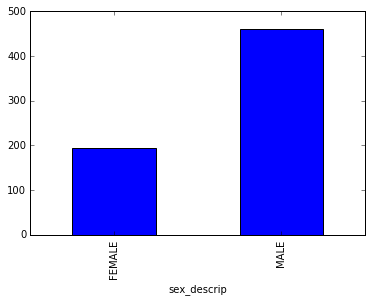

In [73]:
dfanger.groupby('sex_descrip')['age'].count().plot.bar()

<function matplotlib.pyplot.show>

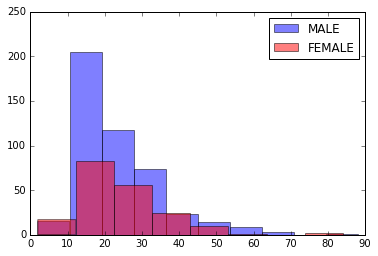

In [74]:
anger_M_plot = dfanger[dfanger.sex_descrip == 'MALE'].age
anger_F_plot =dfanger[dfanger.sex_descrip == 'FEMALE'].age
anger_m = plt.hist(anger_M_plot,alpha=0.5, bins = 10, color = 'blue',label='MALE')
anger_f = plt.hist(anger_F_plot,alpha=0.5, bins = 8,color = 'red',label='FEMALE')
plt.legend()
plt.show

In [86]:
dfanger.groupby('sex_descrip')['age'].mean()

sex_descrip
FEMALE    24.373057
MALE      23.268980
Name: age, dtype: float64

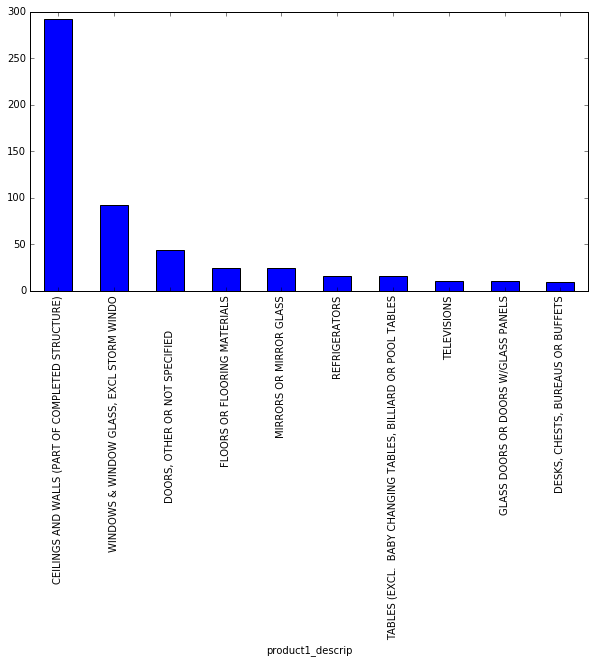

In [75]:
dfanger.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,5))

In [101]:
dfanger_at = {'Mother' : textfind(dfanger,'Notes','\sMOM\s|\sMOTHER\s')['age'].count(),
             'Father': textfind(dfanger,'Notes','\sDAD\s|\sFATHER\s')['age'].count(),
              'Sibling': textfind(dfanger,'Notes','\sBROTHER\s|\sSISTER\s|\sBRO\s|\sSIS\s')['age'].count(),
              'Partner': textfind(dfanger,'Notes','\sGF\s|\sGIRLFRIEND\s|\sWIFE\s|\sHUSBAND\s|\sBOYFRIEND\s|\sBF\s')['age'].count(),
              'Classmate': textfind(dfanger,'Notes','\sCLASSMATE\s')['age'].count(),
              'Teacher': textfind(dfanger,'Notes','\sTEACHER\s')['age'].count(),
              'In-law': textfind(dfanger,'Notes','\sIN LAW\s|\sIN LAWS\s|\sIN-LAW\s|\sIN-LAWS\s')['age'].count()
             }

dfanger_at

{'Classmate': 1,
 'Father': 1,
 'In-law': 1,
 'Mother': 21,
 'Partner': 18,
 'Sibling': 15,
 'Teacher': 2}

In [77]:
dfpunch = textfind(dfanger,'Notes','(?<!WAS|GOT|GET)\sPUNCHED\s(?!BY\s|IN)|\sPUNCH\s(?!TO)')
dfkick = textfind(dfanger,'Notes','(?<!WAS|GOT|GET)\sKICKED\s(?!BY\s|IN)|\sKICK\s(?!TO)')

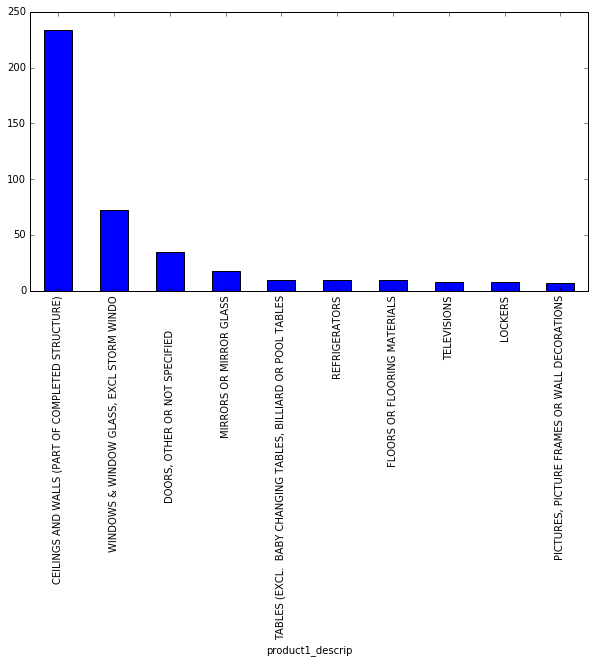

In [87]:
# dfpunch.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(10)
# dfkick.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(10)
#len(dfkick)
#notereader(dfpunch)
dfpunch.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,5))

<function matplotlib.pyplot.show>

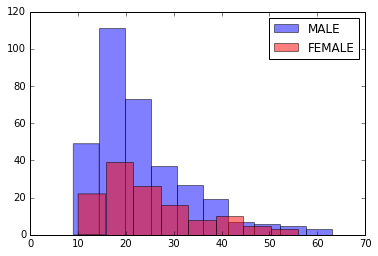

In [93]:
punch_M_plot = dfpunch[dfpunch.sex_descrip == 'MALE'].age
punch_F_plot =dfpunch[dfpunch.sex_descrip == 'FEMALE'].age
anger_m = plt.hist(punch_M_plot,alpha=0.5, bins = 10, color = 'blue',label='MALE')
anger_f = plt.hist(punch_F_plot,alpha=0.5, bins = 8,color = 'red',label='FEMALE')
plt.legend()
plt.show

## What's trying to get you

In [24]:
df1.sex_descrip[df1.sex_descrip == 'MALE'].groupby('product1_descrip').count().sort_values()

KeyError: 'product1_descrip'

In [ ]:
# df1.groupby(['product1_descrip'])['sex_descrip'].count().sort_values(ascending=False)
df1.groupby(['sex_descrip','product1_descrip']).count().sort_values(by='age',ascending=False)

In [ ]:
getyou_M_plot = df1[df1.sex_descrip == 'MALE'].groupby('product1_descrip')['product1_descrip'].count().sort_values(ascending=False).head(10)
getyou_F_plot = df1[df1.sex_descrip == 'FEMALE'].groupby('product1_descrip')['product1_descrip'].count().sort_values(ascending=False).head(10)
pos = list(range(1,11))
getyou_M_plot.plot.bar(pos)
getyou_F_plot.plot.bar()

#plt.legend()
plt.show


In [1]:
fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 10
Mplot = df1[df1.sex_descrip == 'MALE'].groupby(['product1_descrip'])['sex_descrip'].count().sort_values(ascending=False).head(10)
Fplot = df1[df1.sex_descrip == 'FEMALE'].groupby(['product1_descrip'])['sex_descrip'].count().sort_values(ascending=False).head(10)

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, Mplot, width,
                color='green',
                error_kw=dict(elinewidth=2,ecolor='red'))

rects2 = ax.bar(ind+width, Fplot, width,
                    color='yellow',
                    error_kw=dict(elinewidth=2,ecolor='black'))
# # axes and labels
# ax.set_xlim(-width,len(ind)+width)
# #ax.set_ylim(0,45)
# ax.set_ylabel('count')
# ax.set_title('Number of Injuries by Product Type')
xTickMarks = list(Mplot.keys())
ax.set_xticks(width+ind)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=8)

# ## add a legend
# ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

NameError: name 'plt' is not defined

In [ ]:
df1[df1.sex_descrip == 'MALE'].groupby('product1_descrip').count().age.sort_values(ascending=False)

In [ ]:
#Injuries by Body Part
male_body_filter = df1[df1['sex_descrip'].str.contains('MALE')]
female_body_filter = df1[df1['sex_descrip'].str.contains('FEMALE')]
dfmalebody = male_body_filter.groupby(['body_part_descrip'])['Notes'].count()
dffemalebody = female_body_filter.groupby(['body_part_descrip'])['Notes'].count()

body1 = dfmalebody.sort_values(ascending = False).plot(kind='bar', color = 'b', label = 'Male', figsize=(10,7),alpha=0.5)

body2 = dffemalebody.sort_values(ascending = False).plot(kind='bar', color = 'r', label = 'Female', figsize=(10,7),alpha=0.5)

plt.xlabel('Body Part')
plt.ylabel('# of Injuries')
plt.title('2015 ER Injuries by Body Part')
plt.legend()

plt.tight_layout()
plt.show()

## FEAR

In [91]:
dffear = textfind(df1, 'Notes', '\sFEAR\s|\sAFRAID\s|\sSCARED\s')[df1['age'] < 121]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


<function matplotlib.pyplot.show>

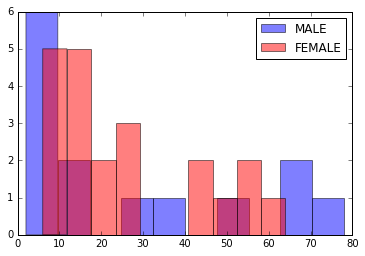

In [95]:
fear_M_plot = dffear[dffear.sex_descrip == 'MALE'].age
fear_F_plot = dffear[dffear.sex_descrip == 'FEMALE'].age
fear_m = plt.hist(fear_M_plot,alpha=0.5, bins = 10, color = 'blue',label='MALE')
fear_f = plt.hist(fear_F_plot,alpha=0.5, bins = 10,color = 'red',label='FEMALE')
plt.legend()
plt.show

In [96]:
dffear.groupby('sex_descrip')['age'].mean()

sex_descrip
FEMALE    25.619048
MALE      26.428571
Name: age, dtype: float64

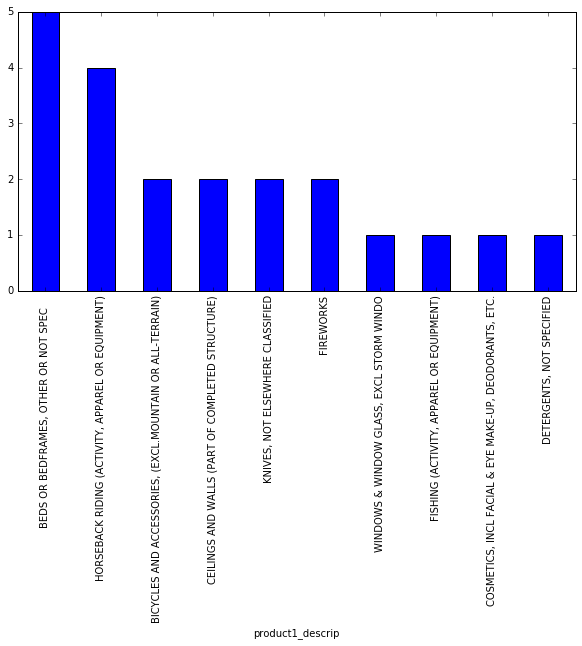

In [98]:
dffear.groupby('product1_descrip')['age'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10,5))

In [109]:
dffear_at = {'Spider' : textfind(dffear,'Notes','SPIDER')['age'].count(),
             'Horse': textfind(dffear,'Notes','\sHORSE|\sPONY\s')['age'].count(),
              'Dog': textfind(dffear,'Notes','\sDOG\s')['age'].count(),
              'Cat': textfind(dffear,'Notes','\sCAT')['age'].count(),
              'Friend': textfind(dffear,'Notes','\sFRIEND\s|\sFRIENDS\s')['age'].count(),
              'Dragonfly': textfind(dffear,'Notes','\sDRAGONFLY\s|\sDRAGON FLY')['age'].count(),
              'In-law': textfind(dffear,'Notes','\sHAUNTED\s')['age'].count()
             }

dffear_at

{'Cat': 2,
 'Dog': 5,
 'Dragonfly': 1,
 'Friend': 2,
 'Horse': 5,
 'In-law': 1,
 'Spider': 1}

In [103]:
dffear

,CPSC Case #,trmt_date,psu,weight,age,sex_descrip,race_descrip,body_part_descrip,diag_descrip,disposition_descrip,fire_descrip,locale_descrip,product1_descrip,product2_descrip,Notes
21414,151031553,2015-10-10,31,5.6748,15,FEMALE,WHITE,HEAD,INTERNAL INJURY,TREATED AND RELEASED,NO FIRE,UNKNOWN,CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),AMUSEMENT ATTRACTIONS (INCLUDING RIDES),"15 YO FEMALE WALKING THROUGH A HAUNTED HOUSE, GOT SCARED AND BUMPED HEAD ON A WALL. DX HEAD INJURY"
24719,150539279,2015-05-10,25,15.0591,2,MALE,BLACK,MOUTH,CONTUSIONS ABRASION,TREATED AND RELEASED,UNKNOWN IF FIRE DEPT. ATTENDED,UNKNOWN,"DETERGENTS, NOT SPECIFIED",NaN,"A 2YOM TO ER WITH CONT TO LIP,FATHER PUT DETERGENT IN CAR,CAUSED IT TOSMOKE,PT GOT SCARED HIT LIP ON BACK SEAT, CONTUSION TO LIP,UNKN RE F.D."
31724,151019980,2015-09-29,37,5.6748,3,MALE,UNKNOWN,ALL PARTS BODY,POISONING,TREATED AND RELEASED,NO FIRE,UNKNOWN,"COSMETICS, INCL FACIAL & EYE MAKE-UP, DEODORANTS, ETC.",NaN,3 YO M BROUGHT IN FOR FEAR OF INGESTION OF TREE TEA OIL - STABLE AT D/CNone
39165,151202967,2015-11-27,16,97.9239,54,FEMALE,WHITE,LOWER ARM,PUNCTURE,TREATED AND RELEASED,NO FIRE,HOME,"BEDS OR BEDFRAMES, OTHER OR NOT SPEC",NaN,54 YOF STATES WAS TRYING TO MOVE SLEEPING DOG THAT WAS ON DAUGHTERSBED & SCARED DOG & WAS BITTEN ON FOREARM DX P'/W LEFT FOREARM
44218,150603054,2015-05-29,21,15.0591,6,FEMALE,UNKNOWN,UPPER ARM,FRACTURE,TREATED AND RELEASED,NO FIRE,UNKNOWN,TRAMPOLINES,NaN,"6YF JUMPING ON TRAMPOLINE, GOT SCARED BY DRAGON FLY&FELL OFF LANDING ONTO SHOULDER>>HUMRUS FX"
54394,150446901,2015-04-12,90,5.6748,17,FEMALE,WHITE,FACE,HEMATOMA,TREATED AND RELEASED,NO FIRE,SPORTS,"HORSEBACK RIDING (ACTIVITY, APPAREL OR EQUIPMENT)",NaN,17 YOF WAS RIDING A HORSE IN A BARREL RACING COMPETITION & THE HORSEGOT SCARED & IT'S HEAD HIT HER FACE- SWELLING TO RT. EYE. DX; HEMATOMA
70934,150310647,2015-01-25,34,15.0591,48,FEMALE,WHITE,FINGER,LACERATION,TREATED AND RELEASED,NO FIRE,HOME,"KNIVES, NOT ELSEWHERE CLASSIFIED",NaN,48 YF WAS SLICING VEGETABLES W/KNIFE AND PT WAS SCARED BY CAT AND PT CUT FINGER. DX FINGER LAC
79156,150247498,2015-02-19,32,5.6748,6,FEMALE,BLACK,FACE,LACERATION,TREATED AND RELEASED,NO FIRE,HOME,"TABLES (EXCL. BABY CHANGING TABLES, BILLIARD OR POOL TABLES",NaN,"6 YOF AT GRANDMOTHERS HOUSE, COUSIN JUMPED OUT AND SCARED HER, SHE FELLHIT FACE ON A GLASS TABLE DX FACIAL LACERATION"
85441,150221942,2015-02-07,89,74.8813,4,MALE,OTHER,FACE,LACERATION,TREATED AND RELEASED,NO FIRE,UNKNOWN,FENCES OR FENCE POSTS,NaN,4YO M WAS SCARED BY HORSE AND BENT DOWN CUTTING UPPER NASAL BRIDGE AREAON WIRE FENCE. DX: FACIAL LACERATION.
87298,150950562,2015-09-16,51,74.8813,46,FEMALE,NaN,LOWER TRUNK,FRACTURE,HOSPITALIZED,NO FIRE,UNKNOWN,"HORSEBACK RIDING (ACTIVITY, APPAREL OR EQUIPMENT)",NaN,46 YO F S/P FALLING OFF HER HORSE W/ LUMBAR PAIN HER HORSE GOT SCARED WHEN AN ONCOMING HORSE APPROACHED DX LUMBAR FX


In [116]:
dffrustration = textfind(df1, 'Notes', '\sFRUSTRATED\s|\sFRUSTRATION\s')[df1['age'] < 121]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [117]:
dffrustration

,CPSC Case #,trmt_date,psu,weight,age,sex_descrip,race_descrip,body_part_descrip,diag_descrip,disposition_descrip,fire_descrip,locale_descrip,product1_descrip,product2_descrip,Notes
18258,150945757,2015-09-14,91,15.7762,41,FEMALE,WHITE,WRIST,LACERATION,TREATED AND RELEASED,NO FIRE,HOME,"WINDOWS & WINDOW GLASS, EXCL STORM WINDO",NaN,41YOFJ FRUSTRATED THAT WINDOW AT HOME WOULDNT OPEN PPUNCHED THROUGH THEGLASS DX-LT WRIST LAC
41341,151247583,2015-12-08,68,97.9239,10,MALE,BLACK,HEAD,OTHER,TREATED AND RELEASED,NO FIRE,SCHOOL,FLOORS OR FLOORING MATERIALS,NaN,"10 YOM BROUGHT INTO BE SEEN. GOT FRUSTRATED AT SCHOOL AND STARTED BANGING HIS HEAD ON THE FLOOR. DX HEADACHE, BEHAVIORAL DISORDER, ADD"
67379,150313058,2015-02-16,93,15.7762,17,MALE,WHITE,WRIST,FRACTURE,TREATED AND RELEASED,NO FIRE,PUBLIC,CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),NaN,17 YOM SLAPPED THE WALL IN FRUSTRATION AT JUVENILE DETENTION.DX: SCAPHOID FX L.
129358,150222513,2015-01-31,50,74.8813,43,MALE,UNKNOWN,HAND,FRACTURE,TREATED AND RELEASED,NO FIRE,UNKNOWN,CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),NaN,"43 YOM FX HAND, REPORTS BEING ANGRY SO HE PUNCHED A WALL TO GET HIS FRUSTRATION OUT"
143674,150804586,2015-07-13,43,83.2157,26,FEMALE,WHITE,INTERNAL,INGESTION,TREATED AND RELEASED,NO FIRE,PUBLIC,JEWELRY,NaN,INGESTED FB/26YOWF FROM GROUP HM WAS OBSERVED BY 2 STAFF MEMBERS SWALLOWING BEADS FROM CHARM BRACELET AFTER SHE BECAME FRUSTRATED W/STAFF.
144120,150540463,2015-05-15,21,15.0591,33,FEMALE,UNKNOWN,ALL PARTS BODY,POISONING,TRANSFERRED,NO FIRE,PUBLIC,DAY WEAR,NaN,"33YF IN THE LOCK UP, FRUSTRATED C PD RX TO HER, TOOK THE STRING OUT OFHER SWEATER C INT. TO DRAW ATT.&TO COME TO ER>>ETOH/ABT0.192/CIU EVAL"
163400,150520205,2015-05-08,21,15.0591,16,MALE,UNKNOWN,HAND,FRACTURE,TREATED AND RELEASED,NO FIRE,UNKNOWN,CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),NaN,16YM WAS FRUSTRATED C HIS HISTORY GRADE SO HE PUNCHED A WALL>>HAND FX
163712,151145513,2015-11-18,24,97.9239,15,FEMALE,UNKNOWN,HAND,CONTUSIONS ABRASION,TREATED AND RELEASED,NO FIRE,SCHOOL,CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),NaN,J/ 15 YOF. RT HAND HAND PAIN & SWELLING AFTER PUNCHING A WALL IN FRUSTRATION AT SCHOOL. DX: CONTUSION HAND.
172812,150235944,2015-02-11,51,74.8813,14,MALE,WHITE,FINGER,LACERATION,TREATED AND RELEASED,NO FIRE,SCHOOL,GLASS DOORS OR DOORS W/GLASS PANELS,NaN,"14 YO M, S/P HIT GLASS DOOR AT SCHOOL AROUND 14:55 INTENTIONALLY PUNCHED IT DUE TO FRUSTRATION DX FINGER LACERATIONS"
179000,150637031,2015-06-04,38,15.7762,18,MALE,UNKNOWN,HAND,OTHER,TREATED AND RELEASED,NO FIRE,UNKNOWN,CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),NaN,18 YR OLD MALE PUNCHED A BRICK WALL FRUSTRATED AND NOW HAS HAND TRAUMANone


In [211]:
test = textfind(df1, 'Notes', '\sPIE\s')[df1['age'] < 121]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [212]:
len(test)

14

In [213]:
test

,CPSC Case #,trmt_date,psu,weight,age,sex_descrip,race_descrip,body_part_descrip,diag_descrip,disposition_descrip,fire_descrip,locale_descrip,product1_descrip,product2_descrip,Notes
1835,151020138,2015-10-06,17,16.5650,28,FEMALE,UNKNOWN,WRIST,LACERATION,TREATED AND RELEASED,NO FIRE,HOME,OTHER COOKWARE,"""RANGES OR OVENS, NOT SPECIFIED """,28YO F WHILE TAKING GLASS PIE PAN OUT OVEN SHATTERED INJURING HANDLAC WRIST
59674,150801798,2015-07-30,28,83.2157,26,FEMALE,WHITE,FINGER,BURNS THERMAL,TREATED AND RELEASED,NO FIRE,HOME,MICROWAVE OVENS,NaN,"26YOF INJ.RT.3,4,5, FINGER TIPS AT HOME WHEN TAKING MEAT PIE OUT OFMICROWAVE OVEN,PIE FELL & PT.TRIED TO CATCH IT.DX;1ST.DEG.BURN RT.3,4,5"
102098,151154226,2015-11-25,73,85.7374,76,FEMALE,UNKNOWN,HAND,BURNS THERMAL,TREATED AND RELEASED,NO FIRE,HOME,"RANGES OR OVENS, NOT SPECIFIED",NaN,76YOF GETTING A PIE OUT OF THE OVEN & TOUCHED THE SIDE OF THE OVEN THERMAL BURN TO HAND
104357,151107489,2015-10-13,54,49.2646,59,FEMALE,WHITE,LOWER ARM,BURNS THERMAL,TREATED AND RELEASED,NO FIRE,HOME,"RANGES OR OVENS, NOT SPECIFIED",NaN,"59YOF BURN LT FOREARM; TAKING APPLE PIE OUT OF OVEN,IT FLIPPED & LANDEDON LT FOREARM DX: 1ST DEGREE BURN, 2ND DEGREE BURN INJ"
126284,151205788,2015-11-29,38,16.5650,34,FEMALE,UNKNOWN,FOOT,BURNS THERMAL,TREATED AND RELEASED,NO FIRE,HOME,"RANGES OR OVENS, NOT SPECIFIED",NaN,34 YR OLD FEMALE COOKING PIE IN OVEN AND THEN DROPPED IT ONTO FOOTTAKING IT OUT AND BURNED FOOT
165694,150233877,2015-02-12,43,80.8381,78,FEMALE,WHITE,HEAD,INTERNAL INJURY,TREATED AND RELEASED,NO FIRE,HOME,ELECTRIC RANGES OR OVENS (EXCL COUNTER-T,NaN,"CHI;PARTIAL THICKNESS BURN R WRIST/78YOWF YEST WHILE REMOVING PIE FROMOVEN,BURNED R WRIST&FELL BACKWARDS ONTO BUTTOCKS.ALSO HIT HEAD."
178601,150911872,2015-08-30,38,15.7762,90,FEMALE,UNKNOWN,HEAD,LACERATION,TREATED AND RELEASED,NO FIRE,HOME,"CHAIRS, OTHER OR NOT SPECIFIED","""RANGES OR OVENS, NOT SPECIFIED """,90 YR OLD FEMALE TAKING PIE OUT OF OVEN AND FELL STRIKNG HEAD ON CHAIRWITH PARIETAL LAC AND CONTUSION
218350,150123951,2015-01-07,99,78.5926,35,MALE,UNKNOWN,FINGER,LACERATION,TREATED AND RELEASED,NO FIRE,HOME,"KNIVES, NOT ELSEWHERE CLASSIFIED",NaN,35 YOM CUTTING A POT PIE W/KNIFE WHEN LAC HIS FINGER DX LAC FINGER%None
218507,160253537,2015-09-18,40,15.7762,84,FEMALE,OTHER,ALL PARTS BODY,OTHER,HOSPITALIZED,NO FIRE,HOME,FLATWARE (EXCL. KNIVES),NaN,84 YOF WAS WALKING IN THE KITCHEN AND REACHING FOR A FORK FOR SOME APPLE PIE & NEXT PT KNEW SHE WOKE UP ON THE FLOOR DX SYNCOPE W/ FALL
228779,151257394,2015-12-23,52,97.9239,26,FEMALE,WHITE,HAND,LACERATION,TREATED AND RELEASED,NO FIRE,HOME,TABLEWARE AND ACCESSORIES,NaN,LAC HAND 26YOF CUT HAND ON GLASS PIE PLATE AT HOMEDX: LAC HAND


In [ ]:
pizza burger excited